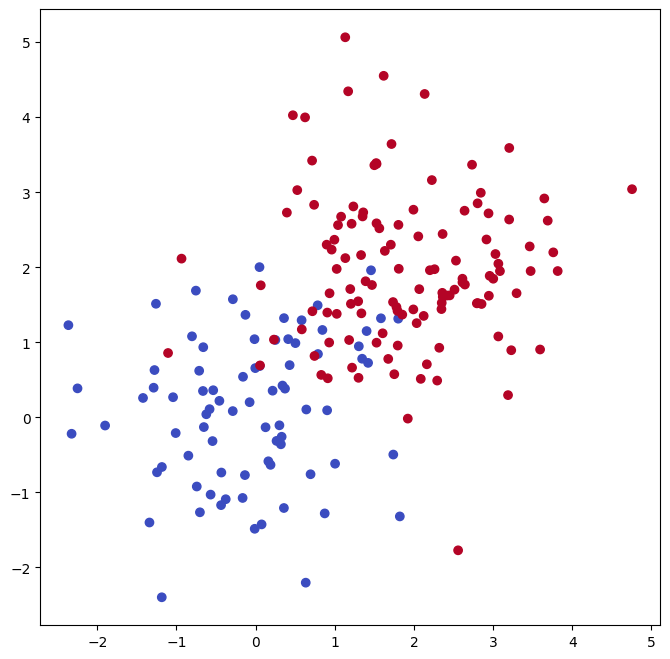

In [7]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
X = rng.standard_normal((200, 2))
y = np.array([-1]*80+[1]*120)
X[y==1] += 2
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=plt.cm.coolwarm);

In [23]:
from sklearn.svm import SVC
import sklearn.model_selection as skm

kfold = skm.KFold(5, random_state=0, shuffle=True)
cvs = []
C = [0.01, 0.1, 0.3, 0.5, 1, 2]
misclassified = []

for c in C:
    svm = SVC(C=c, kernel='linear')
    
    scores = skm.cross_val_score(svm, X, y, cv=kfold, scoring='accuracy')
    cvs.append(scores.mean())
    
    svm.fit(X, y)
    y_pred = svm.predict(X)
    n_mis = (y_pred != y).sum()
    misclassified.append(n_mis)

for c_val, n_mis, cv_acc in zip(C, misclassified, cvs):
    print(f"C={c_val}: misclassified={n_mis}, CV accuracy={cv_acc:.3f}")


C=0.01: misclassified=20, CV accuracy=0.900
C=0.1: misclassified=20, CV accuracy=0.890
C=0.3: misclassified=21, CV accuracy=0.895
C=0.5: misclassified=21, CV accuracy=0.895
C=1: misclassified=20, CV accuracy=0.895
C=2: misclassified=19, CV accuracy=0.895


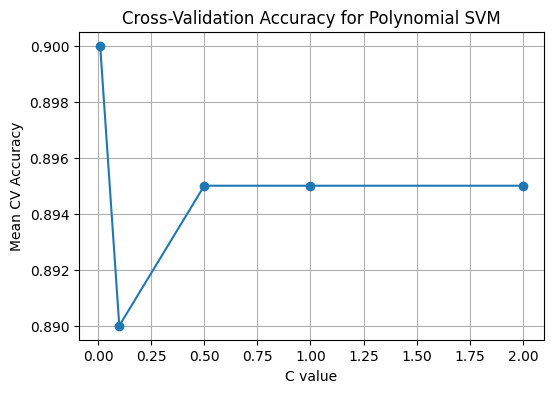

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(C, cvs, marker='o')
plt.xlabel('C value')
plt.ylabel('Mean CV Accuracy')
plt.title('Cross-Validation Accuracy for Polynomial SVM')
plt.grid(True)
plt.show()

The relationship between the number of training misclassifications and the cross-validation errors illustrates the classic trade-off between fitting the training data and generalizing to unseen data. For low **C** values, such as 0.01, the SVM allows a softer margin, resulting in slightly more training misclassifications (20) but achieving the highest cross-validation accuracy (0.900), because the model generalizes well by not overfitting to minor variations or noise. As **C** increases, the SVM penalizes misclassifications more strongly, slightly reducing training errors (down to 19 at **C=2**), but this does not always improve cross-validation accuracy, which remains around 0.895. This occurs because fitting the training data more tightly can slightly overfit, capturing idiosyncrasies in the training set that do not generalize perfectly to the validation folds. Overall, the cross-validation errors reflect the model’s ability to generalize, which is not solely determined by the number of misclassifications on the training set, explaining why small changes in training errors do not always correspond to proportional changes in CV accuracy.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

test_errors = []

for c in C:
    svm = SVC(C=c, kernel='linear')
    svm.fit(X_train, y_train)
    y_pred_test = svm.predict(X_test)
    n_errors = (y_pred_test != y_test).sum()
    test_errors.append(n_errors)

for c_val, n_err in zip(C, test_errors):
    print(f"C={c_val}: test errors={n_err}")

C=0.01: test errors=3
C=0.1: test errors=3
C=0.3: test errors=2
C=0.5: test errors=2
C=1: test errors=2
C=2: test errors=2


The test error results show that a moderate range of **C** values (0.3–2) achieves the fewest misclassifications on the test set, with only 2 errors, while very small **C** values (0.01–0.1) result in slightly higher test errors (3 errors). This demonstrates the classic bias–variance trade-off in SVMs: very low **C** values produce a softer margin that may underfit slightly, allowing more misclassifications even though it generalizes reasonably well, whereas moderate **C** values strike a better balance between fitting the training data and generalizing to unseen data. Comparing these results to the training and cross-validation errors, we see that the **C** values with the fewest test errors do not necessarily correspond to those with the absolute fewest training misclassifications (which occurred at **C=2** with 19 training errors) or the highest cross-validation accuracy (which was slightly higher at very low **C=0.01**). Overall, this indicates that selecting **C** based on cross-validation or test performance rather than purely minimizing training error is crucial for achieving the best generalization.